In [1]:
from collections import defaultdict
import io
import string
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
def parse_line(line):
    values = line.strip().split(' +++$+++ ')
    columns = ['movie_id', 'title', 'release_year', 'rating', 'num_votes', 'genres']
    metadata = dict(zip(columns, values))
    
    metadata['release_year'] = int(metadata['release_year'][:4])
    metadata['rating'] = float(metadata['rating']) 
    metadata['num_votes'] = int(metadata['num_votes'])  
    
    exclude = set(string.punctuation)
    genres = ''.join(ch for ch in metadata['genres'] if ch not in exclude).split()
    metadata['genres'] = genres
    return metadata

In [13]:
metadataMovies = defaultdict(dict)
moviesPerGenre = defaultdict(list)
ratingsPerGenre = defaultdict(list)
watchersPerGenre = defaultdict(int)
lines = io.open('cornell/movie_titles_metadata.txt',mode='r', encoding='latin-1').readlines()
for line in lines:
    metadata = parse_line(line)
    metadataMovies[metadata['movie_id']] = metadata
    for genre in metadata['genres']:
        moviesPerGenre[genre].append(metadata['movie_id'])
        ratingsPerGenre[genre].append(metadata['rating'])
        watchersPerGenre[genre] += metadata['num_votes']       

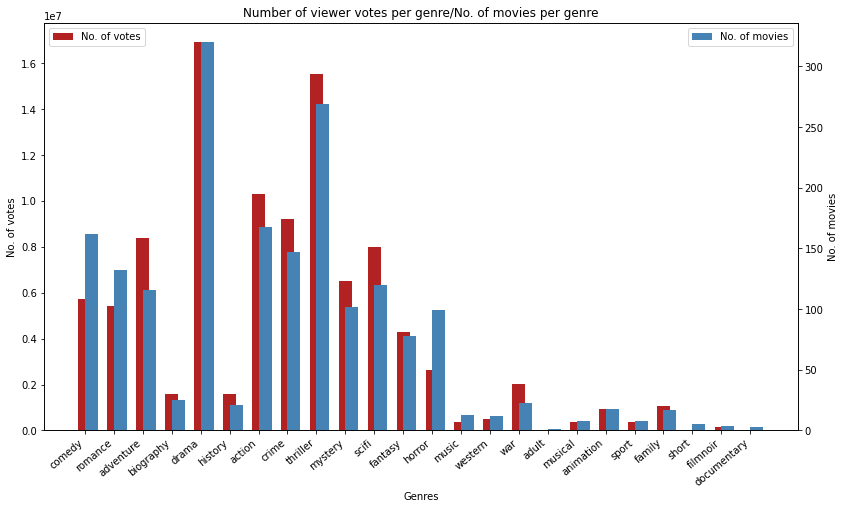

In [40]:
# Distribution of movie genres
genres = [genre for genre in moviesPerGenre]
movies_per_genre = [len(moviesPerGenre[g]) for g in moviesPerGenre]

fig, ax1 = plt.subplots()
ax1.set_title('Number of viewer votes per genre/No. of movies per genre')
ax1.set_xlabel('Genres')
ax1.bar(genres, watchersPerGenre.values(), color='firebrick', 
        width=0.45, align='center', label='No. of votes')
ax1.set_ylabel('No. of votes')
plt.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.bar(genres, movies_per_genre, color='steelblue', 
        width=0.45, align='edge', label='No. of movies')
ax2.set_ylabel('No. of movies')
plt.legend(loc='upper right')

plt.setp(ax1.get_xticklabels(), rotation=40, horizontalalignment='right')
fig.set_size_inches(13.5, 7.5)
plt.show()



In [16]:
# Co-occurence of genres

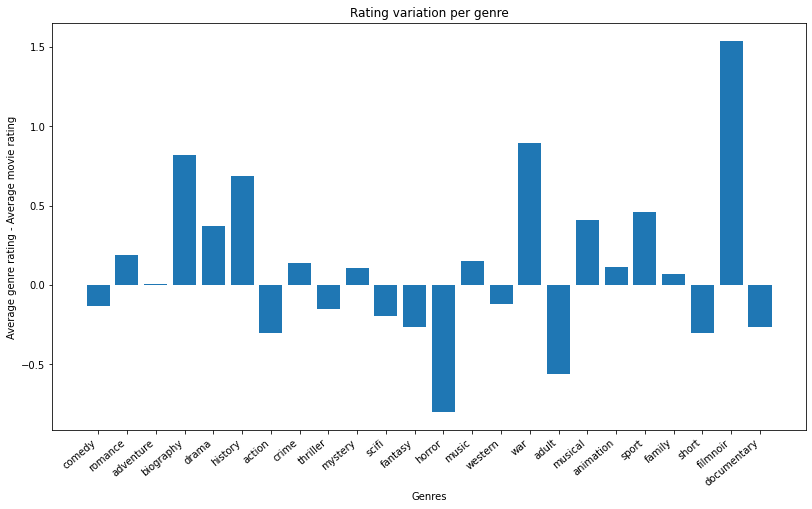

In [8]:
# Average rating per genre
all_ratings = [metadataMovies[m]['rating'] for m in metadataMovies]
mean_rating = np.mean(all_ratings)
rating_variation_per_genre = [np.mean(ratingsPerGenre[g]) - mean_rating for g in ratingsPerGenre]

fig, ax = plt.subplots()
ax.set_title('Rating variation per genre')
ax.bar(genres, rating_variation_per_genre)
ax.set_xlabel('Genres')
ax.set_ylabel('Average genre rating - Average movie rating')
plt.setp(ax.get_xticklabels(), rotation=40, horizontalalignment='right')
fig.set_size_inches(13.5, 7.5)
plt.show()

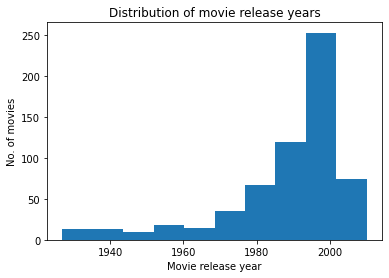

In [12]:
# Distribution of movie release years
movie_release_years = [metadataMovies[m]['release_year'] for m in metadataMovies]

plt.title('Distribution of movie release years')
plt.hist(movie_release_years)
plt.xlabel('Movie release year')
plt.ylabel('No. of movies')
plt.show()

In [14]:
movieCharacters = defaultdict(list)
lines = io.open('cornell/movie_characters_metadata.txt',mode='r', encoding='latin-1').readlines()
for line in lines:
    values = line.strip().split(' +++$+++ ')
    movieCharacters[values[2]].append(values[1].strip())

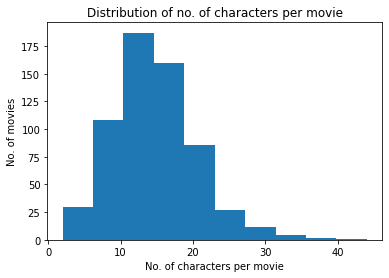

In [8]:
# Distribution of number characters per movie
num_characters_per_movie = [len(movieCharacters[m]) for m in movieCharacters] 

plt.title('Distribution of no. of characters per movie')
plt.hist(num_characters_per_movie)
plt.xlabel('No. of characters per movie')
plt.ylabel('No. of movies')
plt.show()

In [15]:
lineMapping = defaultdict()
lines = io.open('cornell/movie_lines.txt',mode='r', encoding='latin-1').readlines()
for line in lines:
    values = line.strip().split(' +++$+++ ')
    if len(values) == 5:
        lineMapping[values[0]] = values[4]
    else:
        lineMapping[values[0]] = ''

In [16]:
import ast
conversationMovieMapping = defaultdict(list)
conversations = []
lines = io.open('cornell/movie_conversations.txt',mode='r', encoding='latin-1').readlines()
for line in lines:
    values = line.strip().split(' +++$+++ ')
    conv = [n.strip() for n in ast.literal_eval(values[3])]
    conversationForMovie = [lineMapping[x] for x in conv]
    conversations.append((conversationForMovie, values[2]))
    conversationMovieMapping[values[2]].append(conversationForMovie)    

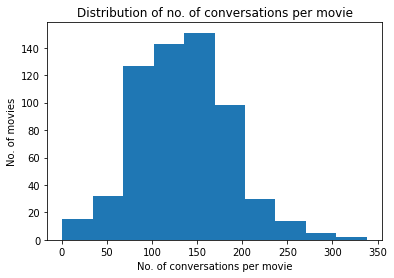

In [11]:
# Distribution of number of coversations per movie
num_conv_per_movie = [len(conversationMovieMapping[m]) for m in conversationMovieMapping] 

plt.title('Distribution of no. of conversations per movie')
plt.hist(num_conv_per_movie)
plt.xlabel('No. of conversations per movie')
plt.ylabel('No. of movies')
plt.show()

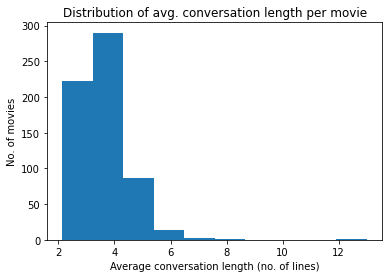

In [12]:
# Distribution of average conversation length per movie
conversation_lengths = {m:[len(conv) for conv in conversationMovieMapping[m]] for m in conversationMovieMapping}
average_conv_length = [np.mean(conversation_lengths[m]) for m in conversation_lengths]

plt.title('Distribution of avg. conversation length per movie')
plt.hist(average_conv_length)
plt.xlabel('Average conversation length (no. of lines)')
plt.ylabel('No. of movies')
plt.show()

In [13]:
completeDataset = open('completeDataset.txt','w+')
for mov in metadataMovies:
    line = mov + ' +++$+++ '
    line += ' +++$+++ '.join(metadataMovies[mov])
    line += ' +++$+++ '
    if len(movieCharacters[mov]) > 0:
        line += str(movieCharacters[mov])
    else:
        line += 'N/A'
    line += ' +++$+++ '
    if len(conversationMovieMapping[mov]) > 0:
        line += str(conversationMovieMapping[mov])
    else:
        line += 'N/A'
    
    line += '\n'
    
    completeDataset.write(line)
completeDataset.close()

In [17]:
mapping = defaultdict()
for line in open('completeDataset.txt','r'):
    values = line.split(' +++$+++ ')
    mapping[values[0]] = values[1:]
    
count = 0

In [18]:
data = {}
for m in metadataMovies:
    data[m] = metadataMovies[m].copy()
    data[m]['characters'] = movieCharacters[m]
    data[m]['conversations'] = conversationMovieMapping[m]

with open('conversation_dataset.json', 'w') as f:
    json.dump(data , f)

In [20]:
with open("conversation_dataset.json", "r") as f:
    dataset = json.load(f)
print(len(list(dataset.keys())))

617


In [43]:
convosDataset = []
for mKey in dataset:
    mValues = dataset[mKey]
    movieValues = [m[1] for m in mValues.items()]
    conversationsOfMovie = movieValues[7]
    convosDataset.extend([[conv,movieValues[1],movieValues[2],movieValues[3],movieValues[4],movieValues[5],movieValues[6]] for conv in conversationsOfMovie])


In [44]:
#–––––––––––––––––––––––––––––––––––––––––––––––––Model start–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––#

In [45]:
len(convosDataset)

83097

In [49]:
train = convosDataset[:int(0.8*len(convosDataset))]
test = convosDataset[int(0.8*len(convosDataset)):]

In [48]:
print(len(train))

66477
